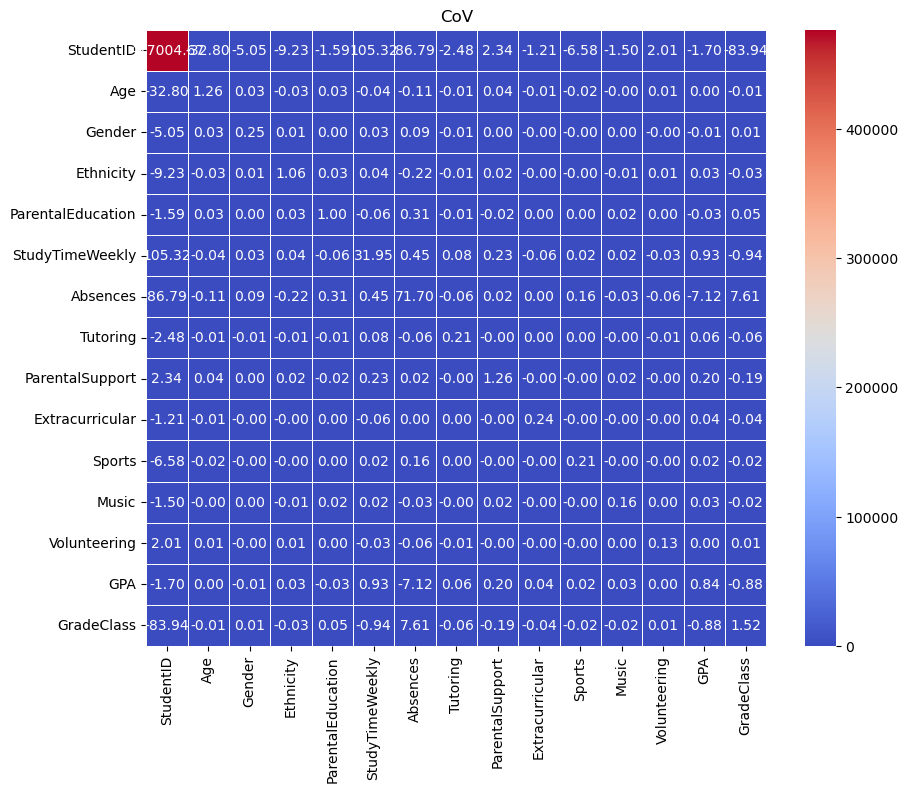

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
df = pd.read_csv('Student_performance_data _.csv')
cov_matrix = df.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('CoV')
plt.show()

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6951983298538622
              precision    recall  f1-score   support

         0.0       0.60      0.14      0.22        22
         1.0       0.48      0.51      0.50        49
         2.0       0.53      0.58      0.55        85
         3.0       0.52      0.38      0.44        86
         4.0       0.84      0.94      0.89       237

    accuracy                           0.70       479
   macro avg       0.59      0.51      0.52       479
weighted avg       0.68      0.70      0.68       479



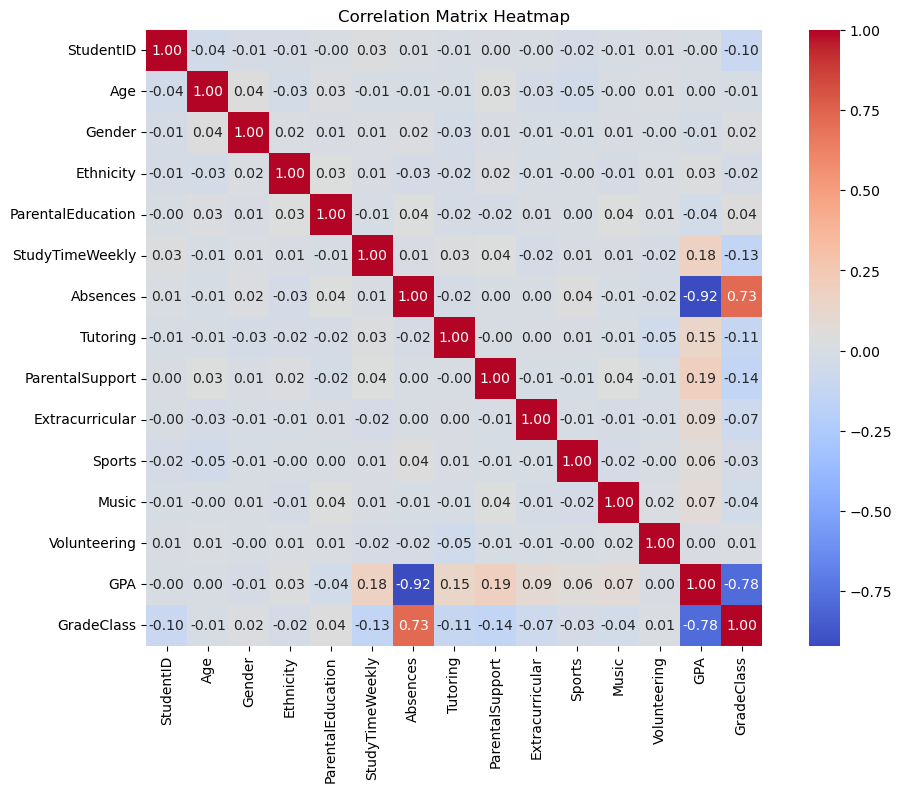

In [8]:

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()